In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import researchpy as rp

# warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cancer.csv")
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)
data = data.rename(columns = {"diagnosis":"target",'concave points_mean':'concave_points_mean','concave points_worst':'concave_points_worst','concave points_se':'concave_points_se'})
data["target"] = [1 if i == "M" else 0 for i in data.target] #Change to  1 if M is available. Change to 0 if not
print(data.target.value_counts())

0    357
1    212
Name: target, dtype: int64


In [3]:
import pandas_profiling as pp
profile = data.profile_report(title='Cancer First Look', pool_size = 0)
profile.to_file(output_file="output.html")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
data.head()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
data.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.describe(include = 'all').T

count        mean         std         min  \
target                   569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave_points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave_points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave_points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
target                     0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave_points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave_points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [8]:
data.isnull().values.any()#looking for missing data 

False

In [9]:
data.isnull().sum()#another way

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
data.corr()

target  radius_mean  texture_mean  perimeter_mean  \
target                   1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave_points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                0.567134     0.679090      0.275869        0.691765   
texture_se              -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se             0.556141     0.674172      0.281673        0.693135   
area_se                  0.548236     0.735864      0.259845        0.744983   
smoothness_se           -0.067016    -0.222600      0.006614       -0.202694   
compactness_se           0.292999     0.206000      0.191975        0.250744   
concavity_se             0.253730     0.194204      0.143293        0.228082   
concave_points_se        0.408042     0.376169      0.163851        0.407217   
symmetry_se             -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.077972    -0.042641      0.054458       -0.005523   
radius_worst             0.776454     0.969539      0.352573        0.969476   
texture_worst            0.456903     0.297008      0.912045        0.303038   
perimeter_worst          0.782914     0.965137      0.358040        0.970387   
area_worst               0.733825     0.941082      0.343546        0.941550   
smoothness_worst         0.421465     0.119616      0.077503        0.150549   
compactness_worst        0.590998     0.413463      0.277830        0.455774   
concavity_worst          0.659610     0.526911      0.301025        0.563879   
concave_points_worst     0.793566     0.744214      0.295316        0.771241   
symmetry_worst           0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst  0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
target                    0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave_points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave_points_se         0.372320         0.380676          0.642262   
symmet

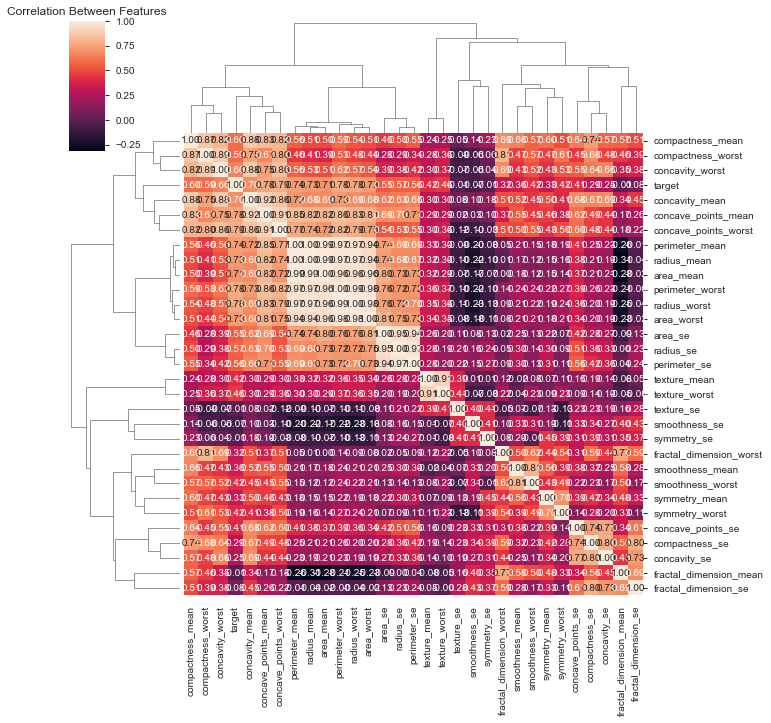

In [11]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [12]:
# 
threshold = 0.50

filtre = np.abs(corr_matrix["target"]) > threshold 

'\nYou should remove the columns that are normally too correlated. Because the machine cannot learn a lot from them. \nTraining Speed \u200b\u200bdecreases.\nBut our data is very low. No need to do it\nOr regularization methods can be used\n'

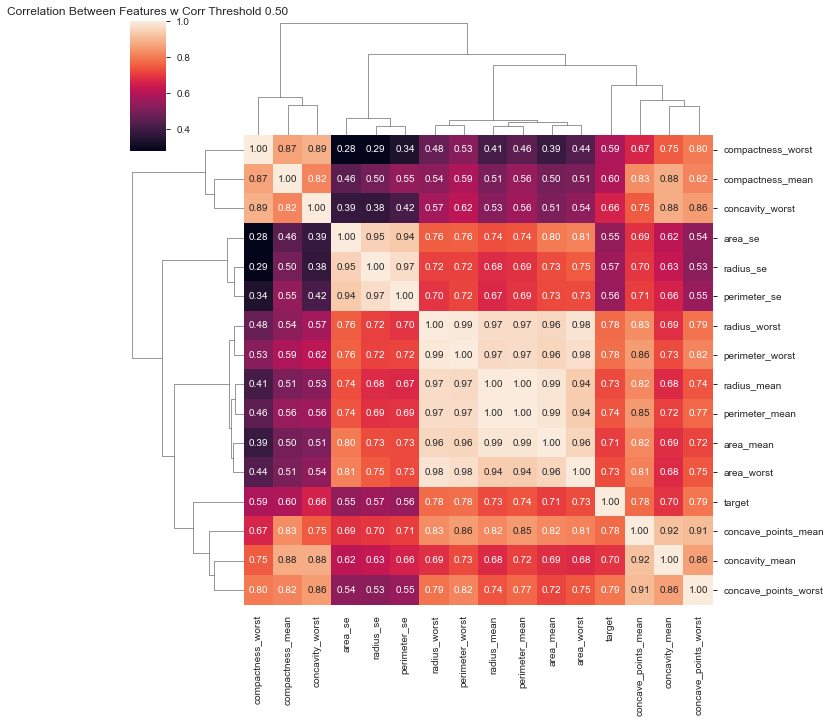

In [13]:
corr_features = corr_matrix.columns[filtre].tolist()#apply filter to columns of data and convert to list
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.50")

'''
You should remove the columns that are normally too correlated. Because the machine cannot learn a lot from them. 
Training Speed ​​decreases.
But our data is very low. No need to do it
Or regularization methods can be used
'''

In [14]:
#Also
rp.summary_cont(data[corr_features]) 

Variable      N        Mean          SD         SE  \
0                 target  569.0    0.372583    0.483918   0.020287   
1            radius_mean  569.0   14.127292    3.524049   0.147736   
2         perimeter_mean  569.0   91.969033   24.298981   1.018666   
3              area_mean  569.0  654.889104  351.914129  14.753008   
4       compactness_mean  569.0    0.104341    0.052813   0.002214   
5         concavity_mean  569.0    0.088799    0.079720   0.003342   
6    concave_points_mean  569.0    0.048919    0.038803   0.001627   
7              radius_se  569.0    0.405172    0.277313   0.011626   
8           perimeter_se  569.0    2.866059    2.021855   0.084761   
9                area_se  569.0   40.337079   45.491006   1.907082   
10          radius_worst  569.0   16.269190    4.833242   0.202620   
11       perimeter_worst  569.0  107.261213   33.602542   1.408692   
12            area_worst  569.0  880.583128  569.356993  23.868687   
13     compactness_worst  569.0    0.254265    0.157336   0.006596   
14       concavity_worst  569.0    0.272188    0.208624   0.008746   
15  concave_points_worst  569.0    0.114606    0.065732   0.002756   

     95% Conf.    Interval  
0     0.332737    0.412430  
1    13.837117   14.417467  
2    89.968221   93.969846  
3   625.911994  683.866213  
4     0.099992    0.108690  
5     0.082235    0.095364  
6     0.045724    0.052114  
7     0.382338    0.428006  
8     2.699577    3.032542  
9    36.591285   44.082873  
10   15.871214   16.667166  
11  104.494332  110.028094  
12  833.701464  927.464792  
13    0.241310    0.267220  
14    0.255010    0.289367  
15    0.109194    0.120019

In [15]:
data[corr_features].cov()

target  radius_mean  perimeter_mean      area_mean  \
target                  0.234177     1.244954        8.732438     120.738222   
radius_mean             1.244954    12.418920       85.447142    1224.483409   
perimeter_mean          8.732438    85.447142      590.440480    8435.772345   
area_mean             120.738222  1224.483409     8435.772345  123843.554318   
compactness_mean        0.015246     0.094197        0.714714       9.264931   
concavity_mean          0.026864     0.190128        1.387234      19.244924   
concave_points_mean     0.014583     0.112475        0.802360      11.241958   
radius_se               0.076107     0.663650        4.661401      71.490945   
perimeter_se            0.544135     4.803550       34.053028     517.009995   
area_se                12.068819   117.968162      823.492755   12808.517580   
radius_worst            1.816042    16.513749      113.858063    1637.521341   
perimeter_worst        12.730868   114.288570      792.328208   11341.789807   
area_worst            202.184994  1888.227223    13026.148359  192192.557633   
compactness_worst       0.044997     0.229249        1.742478      21.616602   
concavity_worst         0.066592     0.387386        2.858506      37.634415   
concave_points_worst    0.025243     0.172393        1.231848      16.701789   

                      compactness_mean  concavity_mean  concave_points_mean  \
target                        0.015246        0.026864             0.014583   
radius_mean                   0.094197        0.190128             0.112475   
perimeter_mean                0.714714        1.387234             0.802360   
area_mean                     9.264931       19.244924            11.241958   
compactness_mean              0.002789        0.003718             0.001703   
concavity_mean                0.003718        0.006355             0.002850   
concave_points_mean           0.001703        0.002850             0.001506   
radius_se                     0.007286        0.013970             0.007511   
perimeter_se                  0.058612        0.106443             0.055753   
area_se                       1.094708        2.239119             1.218501   
radius_worst                  0.136643        0.265181             0.155721   
perimeter_worst               1.047413        1.954350             1.116016   
area_worst                   15.323436       30.682405            17.886881   
compactness_worst             0.007194        0.009469             0.004075   
concavity_worst               0.008994        0.014704             0.006091   
concave_points_worst          0.002831        0.004513             0.002321   

                       radius_se  perimeter_se       area_se  radius_worst  \
target                  0.076107      0.544135     12.068819      1.816042   
radius_mean             0.663650      4.803550    117.968162     16.513749   
perimeter_mean          4.661401     34.053028    823.492755    113.858063   
area_mean              71.490945    517.009995  12808.517580   1637.521341   
compactness_mean        0.007286      0.058612      1.094708      0.136643   
concavity_mean          0.013970      0.106443      2.239119      0.265181   
concave_points_mean     0.007511      0.055753      1.218501      0.155721   
radius_se               0.076902      0.545432     12.007561      0.958416   
perimeter_se            0.545432      4.087896     86.241978      6.813122   
area_se                12.007561     86.241978   2069.431583    166.522900   
radius_worst            0.958416      6.813122    166.522900     23.360224   
perimeter_worst         6.706311     48.986473   1163.599863    161.387312   
area_worst            118.661947    841.165375  21015.970960   2707.850532   
compactness_worst       0.012527      0.108769      2.027379      0.361835   
concavity_worst         0.022018      0.176695      3.654804      0.578757   
concave_points_worst    0.009680      0.073747      1.609241      0.25016

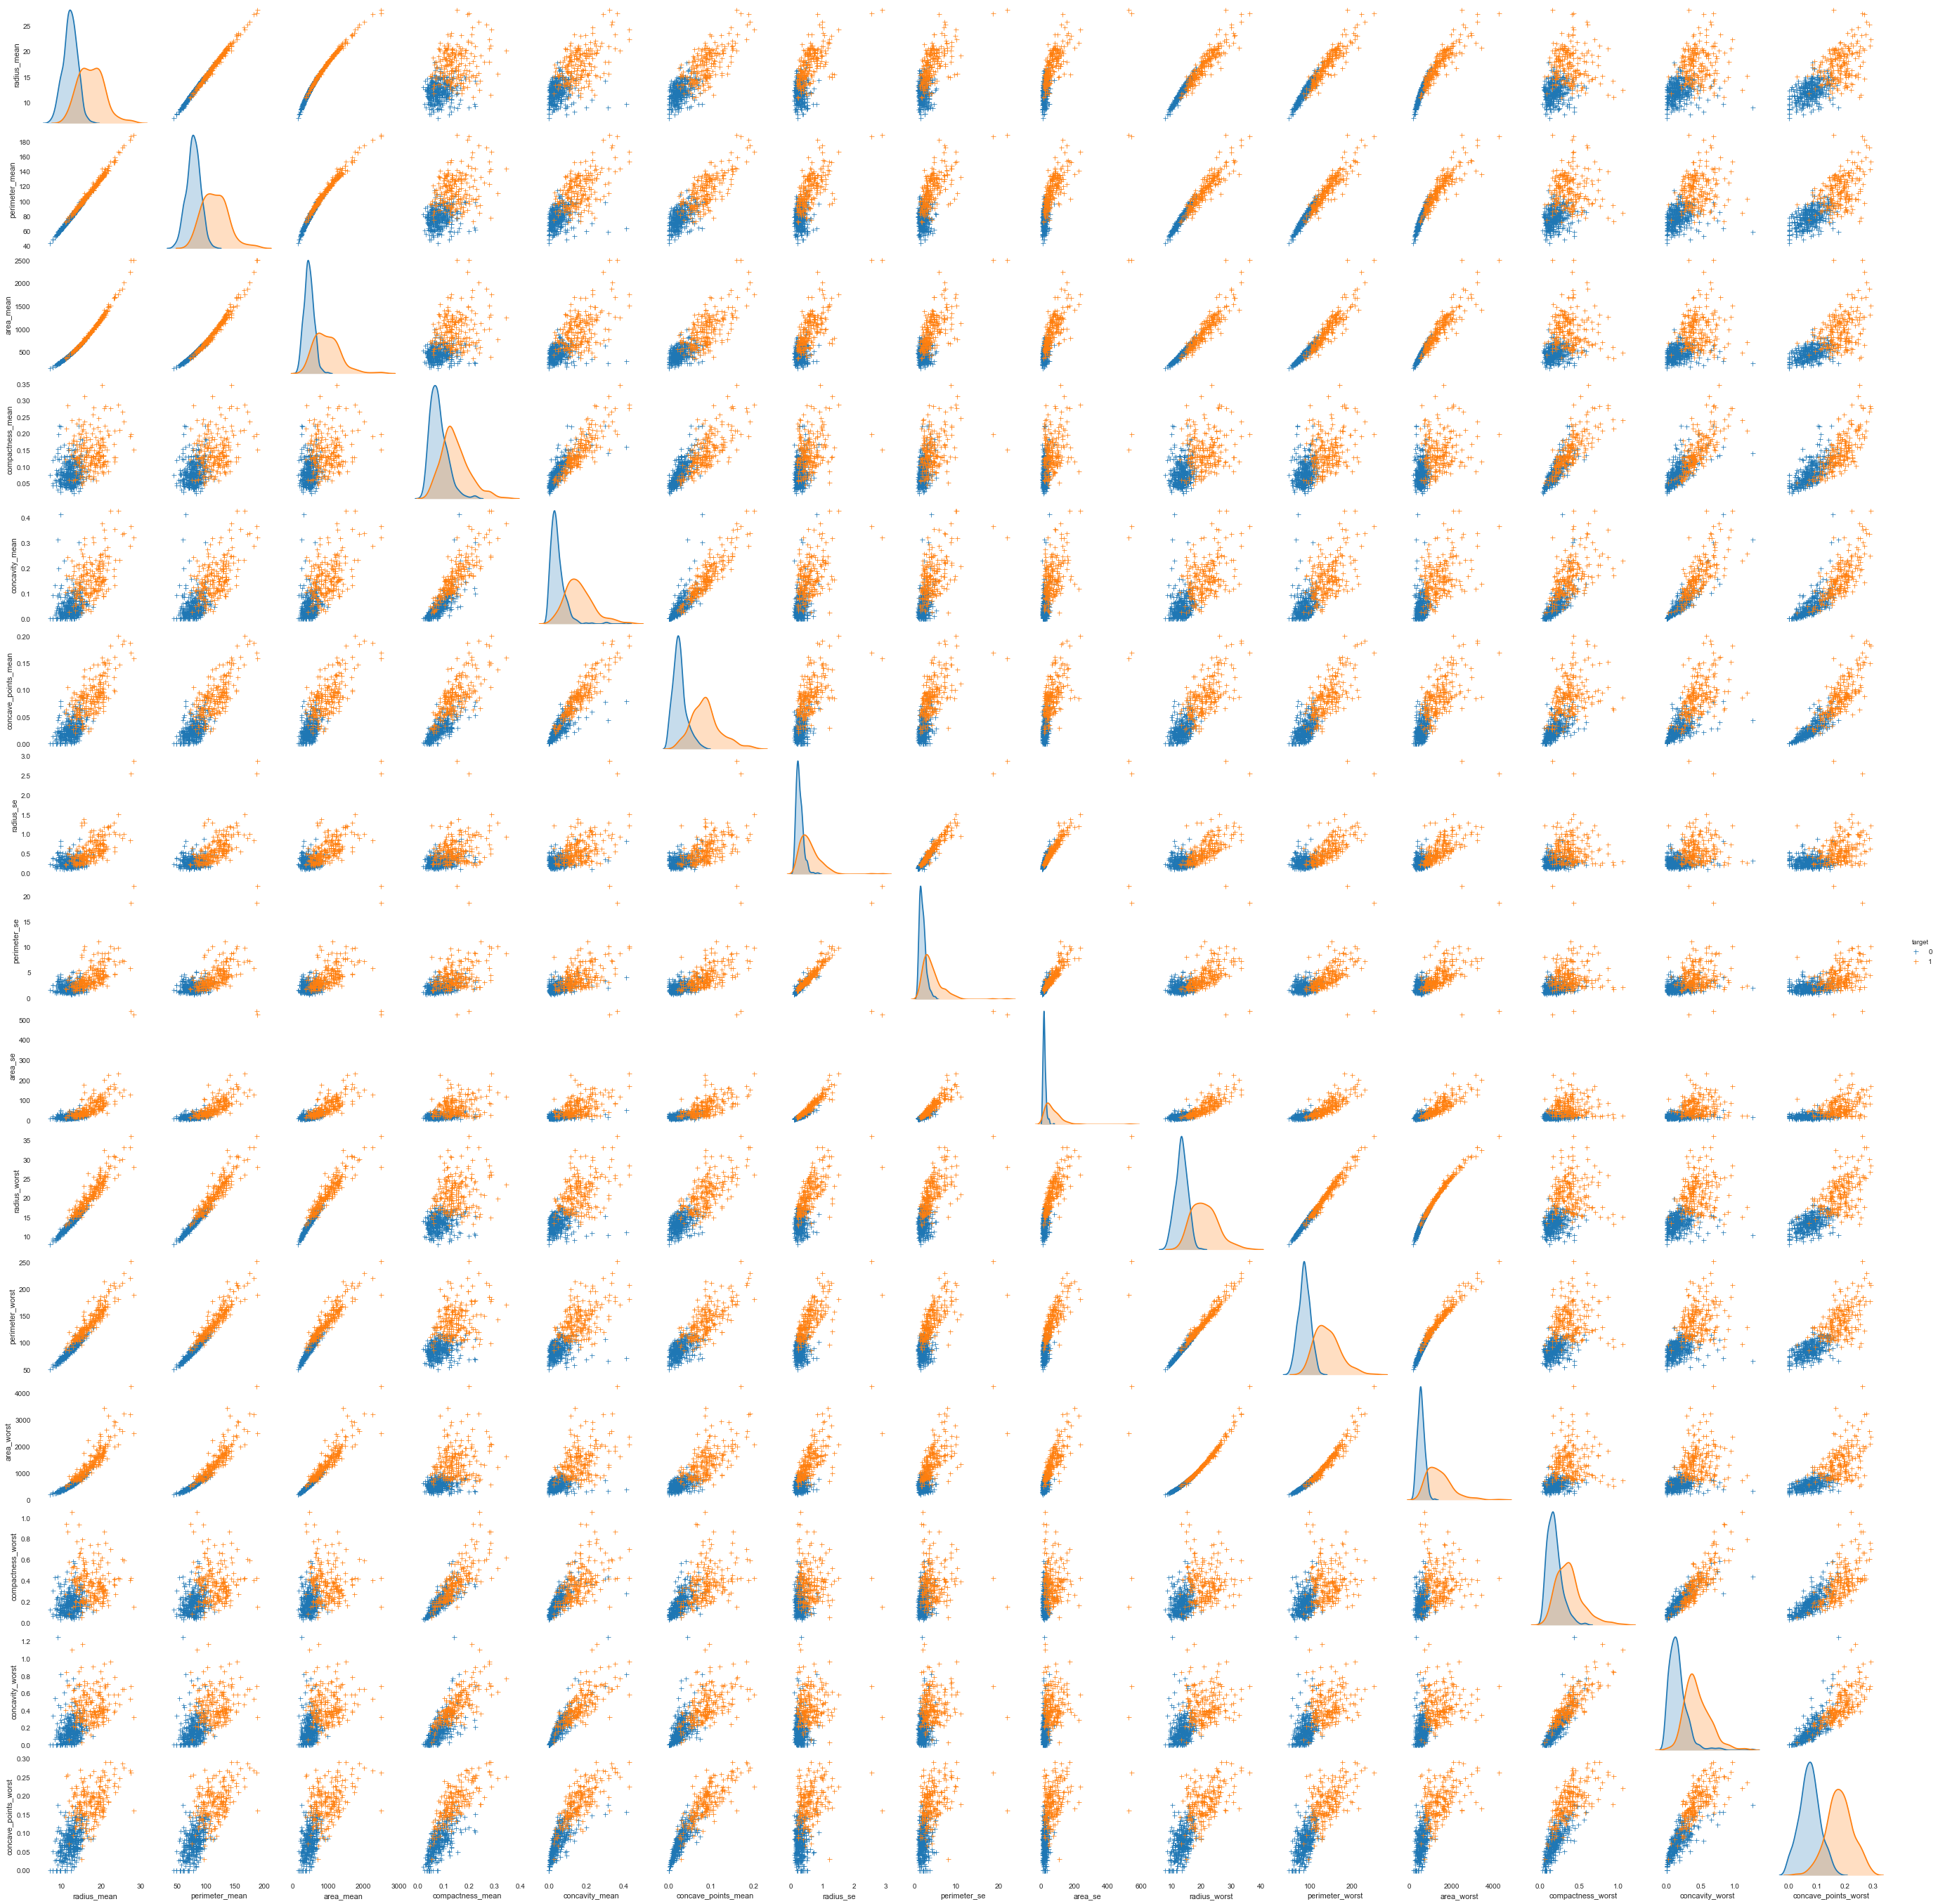

In [16]:
corr_features = corr_matrix.columns[filtre].tolist()
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

#we have a skewed data.you can do logarithmic transformation .With this method, you can remove the skew.
# https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

In [17]:
'''As you can see in the data, there is a skew to the right.

We can fix it using log transformation.'''

'As you can see in the data, there is a skew to the right.\n\nWe can fix it using log transformation.'

In [18]:
log_transformed_data = pd.DataFrame()
log_transformed_data['target'] = data['target']
log_transformed_data['radius_mean'] = np.log(data.radius_mean.values)
log_transformed_data['texture_mean'] = np.log(data.texture_mean.values)
log_transformed_data['perimeter_mean'] = np.log(data.perimeter_mean.values)
log_transformed_data['area_mean'] = np.log(data.area_mean.values)
log_transformed_data['smoothness_mean'] = np.log(data.smoothness_mean.values)
log_transformed_data['compactness_mean'] = np.log(data.compactness_mean.values)
log_transformed_data['concavity_mean'] = np.log(data.concavity_mean.values)
log_transformed_data['concave_points_mean'] = np.log(data.concave_points_mean.values)
log_transformed_data['symmetry_mean'] = np.log(data.symmetry_mean.values)
log_transformed_data['fractal_dimension_mean'] = np.log(data.fractal_dimension_mean.values)
log_transformed_data['radius_se'] = np.log(data.radius_se.values)
log_transformed_data['texture_se'] = np.log(data.texture_se.values)
log_transformed_data['perimeter_se'] = np.log(data.perimeter_se.values)
log_transformed_data['area_se'] = np.log(data.area_se.values)
log_transformed_data['smoothness_se'] = np.log(data.smoothness_se.values)
log_transformed_data['compactness_se'] = np.log(data.compactness_se.values)
log_transformed_data['concavity_se'] = np.log(data.concavity_se.values)
log_transformed_data['concave_points_se'] = np.log(data.concave_points_se.values)
log_transformed_data['symmetry_se'] = np.log(data.symmetry_se.values)
log_transformed_data['fractal_dimension_se'] = np.log(data.fractal_dimension_se.values)
log_transformed_data['radius_worst'] = np.log(data.radius_worst.values)
log_transformed_data['texture_worst'] = np.log(data.texture_worst.values)
log_transformed_data['perimeter_worst'] = np.log(data.perimeter_worst.values)
log_transformed_data['area_worst'] = np.log(data.area_worst.values)
log_transformed_data['smoothness_worst'] = np.log(data.smoothness_worst.values)
log_transformed_data['compactness_worst'] = np.log(data.compactness_worst.values)
log_transformed_data['concavity_worst'] = np.log(data.concavity_worst.values)
log_transformed_data['concave_points_worst'] = np.log(data.concave_points_worst.values)
log_transformed_data['symmetry_worst'] = np.log(data.symmetry_worst.values)
log_transformed_data['fractal_dimension_worst'] = np.log(data.fractal_dimension_worst.values)

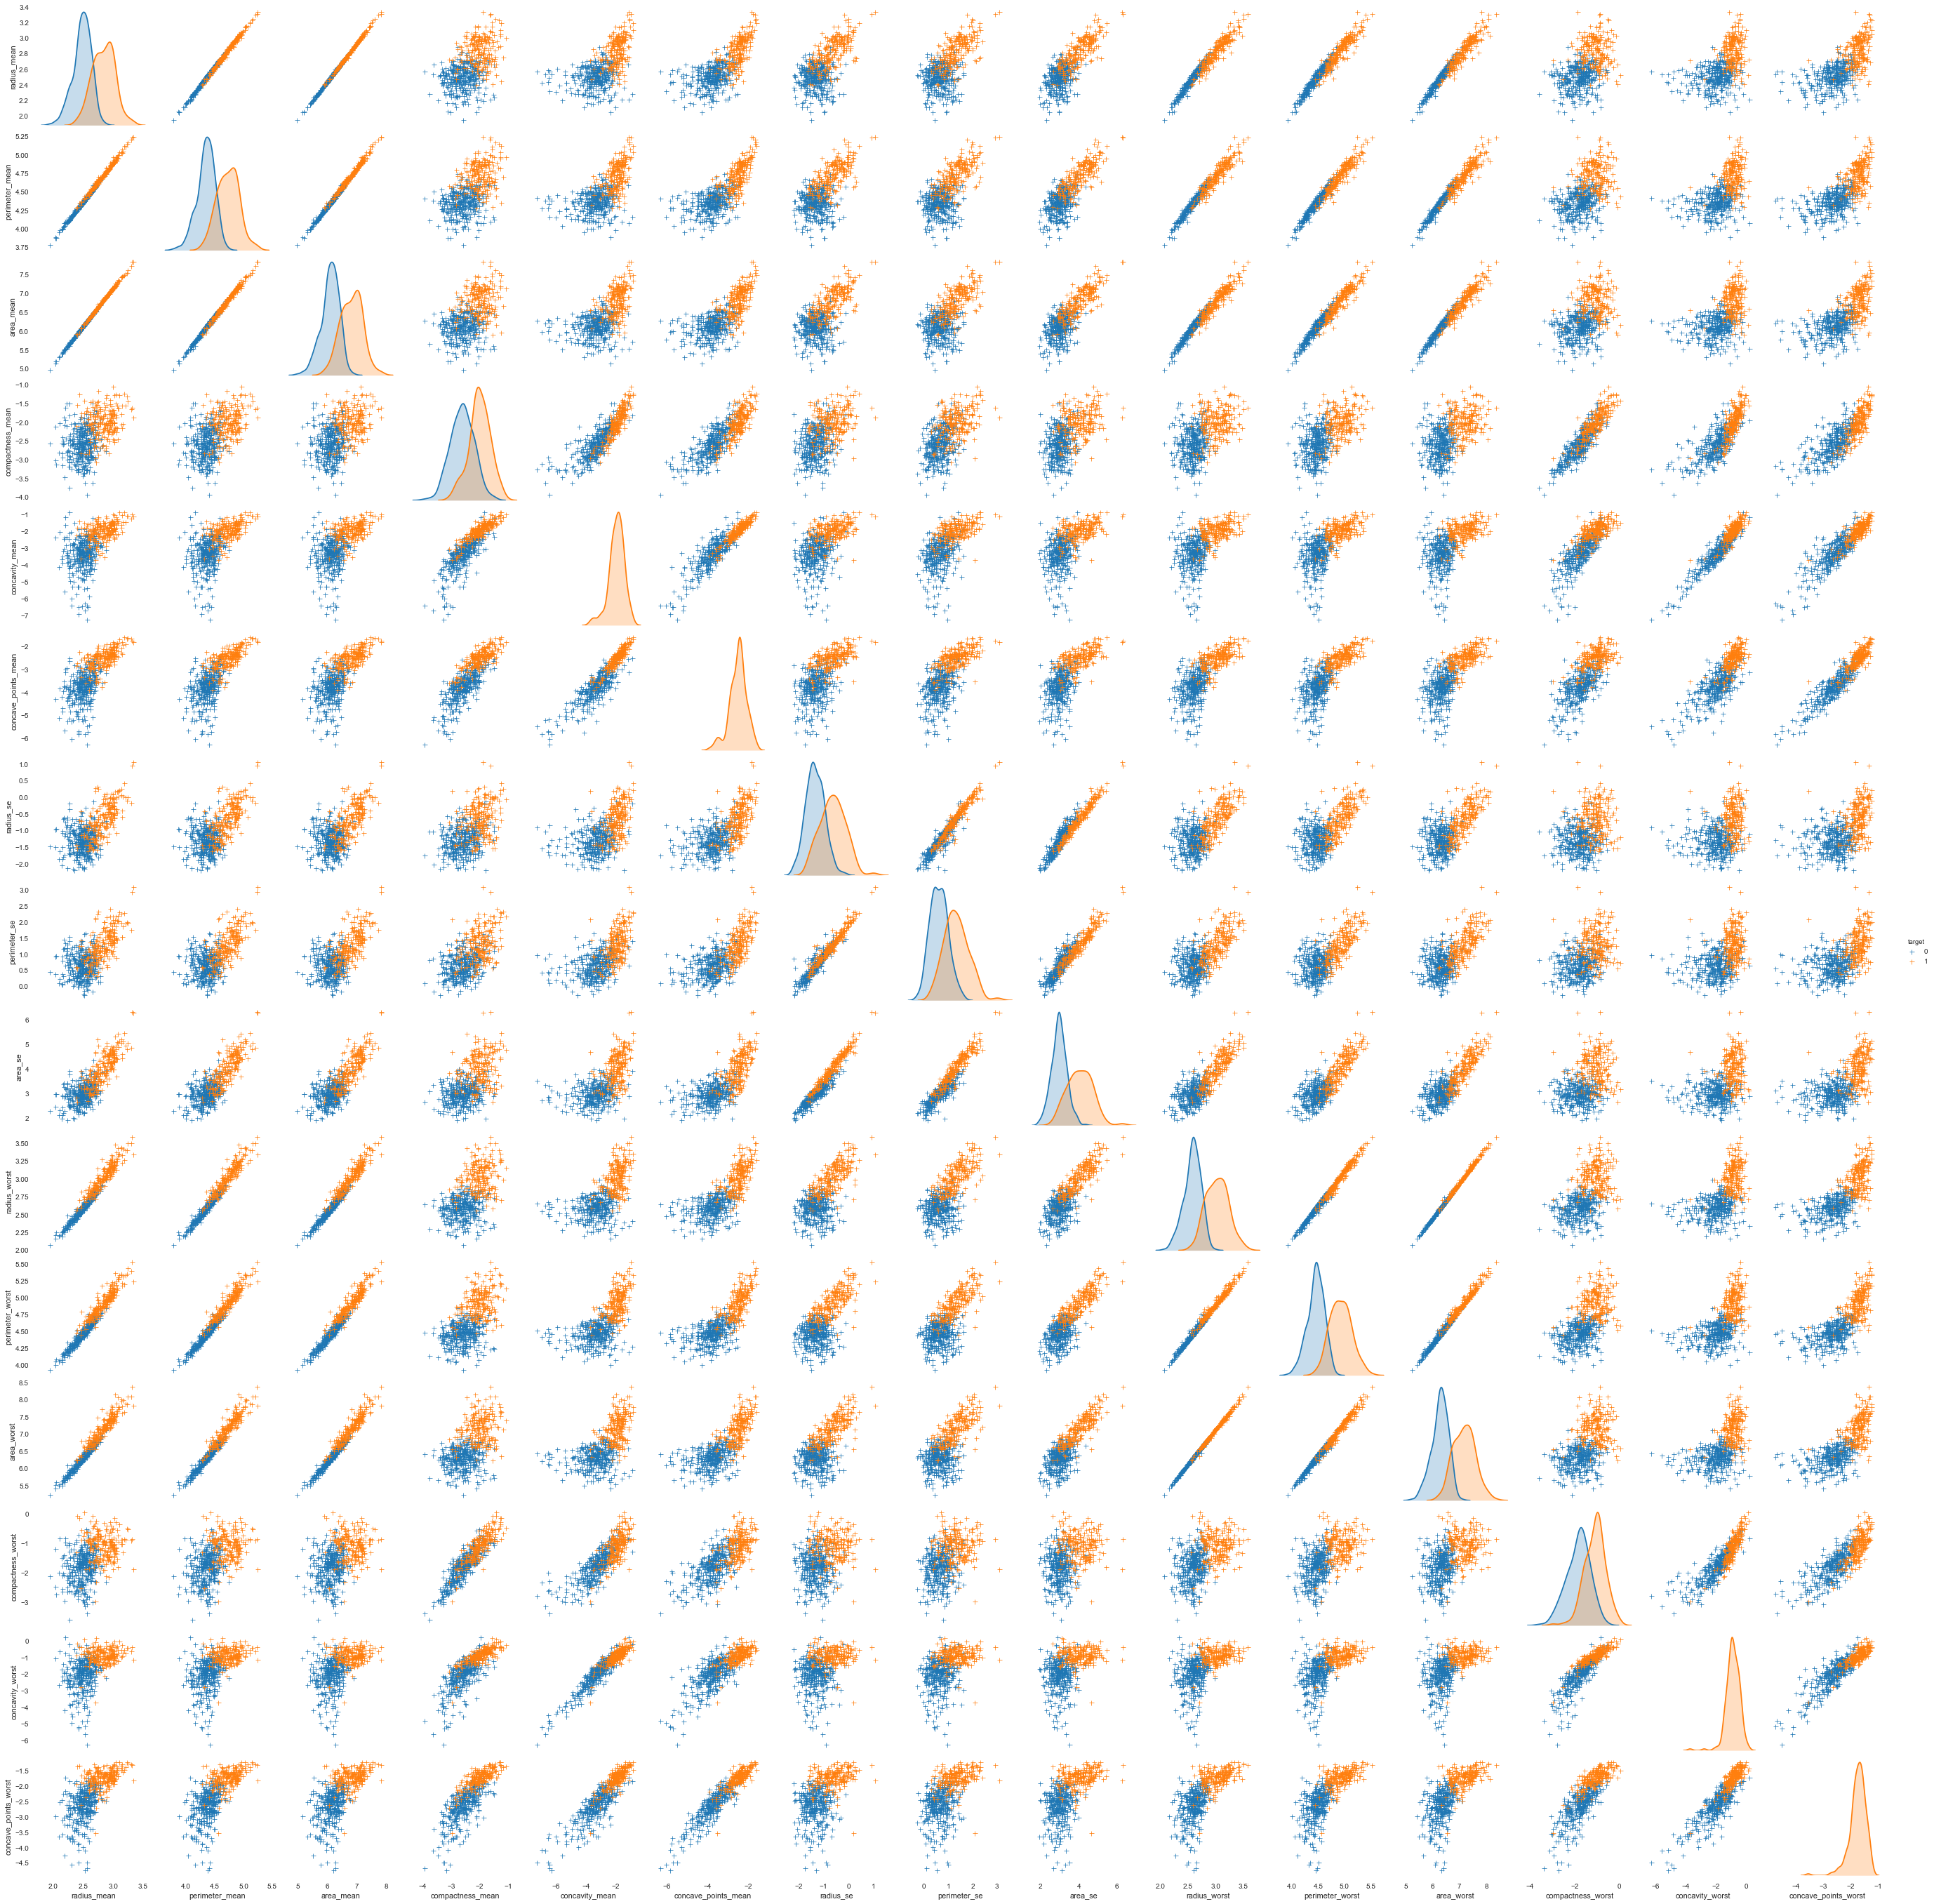

In [19]:
corr_features_for_log_data = corr_matrix.columns[filtre].tolist()
sns.pairplot(log_transformed_data[corr_features_for_log_data], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

In [20]:
'''
As you can see, the distortion is less, so standardization or normalization is important.
Just one example of log transformat.
We will use min-max when building the model
'''

'\nAs you can see, the distortion is less, so standardization or normalization is important.\nJust one example of log transformat.\nWe will use min-max when building the model\n'

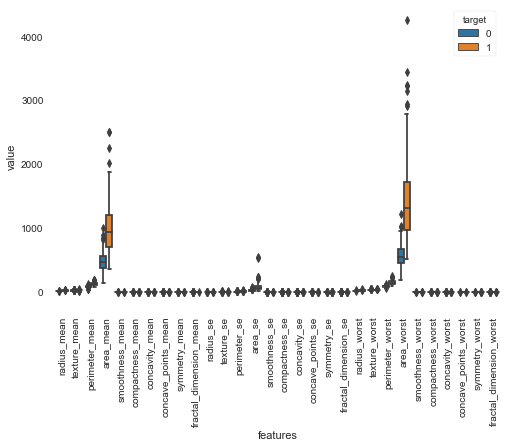

In [21]:
# box plot 
#Not normalize , not log transform
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()
#nothing is understood without any action.

In [22]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

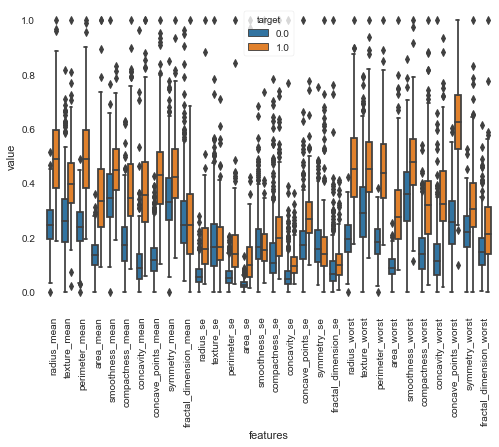

'\nnormalization better than others\n'

In [23]:
Normalize = normalize(data)
data_melt_normalize = pd.melt(Normalize, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melt_normalize)
plt.xticks(rotation = 90)
plt.show()

'''
normalization better than others for data understanding with plot
'''

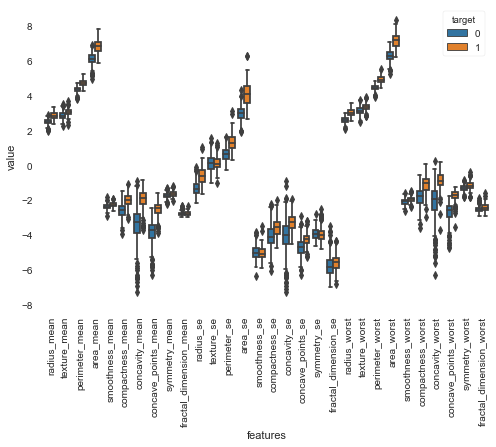

In [24]:
data_melt_log = pd.melt(log_transformed_data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melt_log)
plt.xticks(rotation = 90)
plt.show()
#With log transform

In [25]:
#2 dataya sahibiz 2si içinde aykırı değerleri çıkaracağız.

Q1 = data.quantile(0.25)# ilk yuzde 25lık deger 
Q3 = data.quantile(0.75) # son 25lık deger 
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR


ust_sinir = Q3 + 1.5*IQR

aykiri_tf = (data < (alt_sinir)) | (data > (ust_sinir))
aykirilar = data[aykiri_tf]
data = pd.DataFrame(data)
clean_data = data[~((data < (alt_sinir)) | (data > (ust_sinir))).any(axis = 1)]

In [26]:
clean_data.shape

(398, 31)

In [27]:
##KNN+PCA+NCA+TUNE
min_max_scaler = preprocessing.MinMaxScaler()
y = clean_data.target
x = clean_data.drop(["target"],axis = 1)
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(x_test, y_test)
precision_score = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Score: ",score)
print("CM: ",cm)
print("Normal KNN Acc: ",acc)
print('Normal KNN Precision Score:',precision_score)
print('Normal KNN Recall Score:',recall)

Score:  0.925
CM:  [[85  1]
 [ 8 26]]
Normal KNN Acc:  0.925
Normal KNN Precision Score: 0.9629629629629629
Normal KNN Recall Score: 0.7647058823529411


In [29]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,151))
    weight_options = ["uniform","distance"]
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 20, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print("ACC Test Score: {}, ACC Train Score: {}".format(acc_test, acc_train))
    print("Tune CM Test: ",cm_test)
    print("Tune CM Train: ",cm_train)
    print(classification_report(y_test, y_pred_test, target_names=['1','0']))
    
    return grid
    
    
grid = KNN_Best_Params(x_train, x_test, y_train, y_test)


Best training score: 0.9637362637362639 with parameters: {'n_neighbors': 6, 'weights': 'distance'}

Test Score: 0.9416666666666667, Train Score: 1.0
ACC Test Score: 0.9416666666666667, ACC Train Score: 1.0
Tune CM Test:  [[84  2]
 [ 5 29]]
Tune CM Train:  [[214   0]
 [  0  64]]
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        86
           0       0.94      0.85      0.89        34

    accuracy                           0.94       120
   macro avg       0.94      0.91      0.93       120
weighted avg       0.94      0.94      0.94       120



Best training score: 0.9497252747252747 with parameters: {'n_neighbors': 6, 'weights': 'uniform'}

Test Score: 0.9, Train Score: 0.9568345323741008
ACC Test Score: 0.9, ACC Train Score: 0.9568345323741008
Tune CM Test:  [[82  4]
 [ 8 26]]
Tune CM Train:  [[209   5]
 [  7  57]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        86
           0       0.87      0.76      0.81        34

    accuracy                           0.90       120
   macro avg       0.89      0.86      0.87       120
weighted avg       0.90      0.90      0.90       120



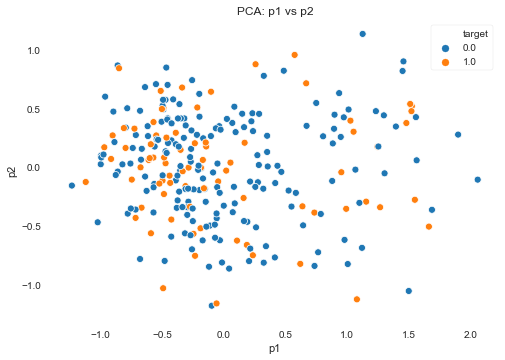

In [30]:
# %% PCA
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

Best training score: 0.9964285714285716 with parameters: {'n_neighbors': 7, 'weights': 'uniform'}

Test Score: 0.9666666666666667, Train Score: 0.9964028776978417
ACC Test Score: 0.9666666666666667, ACC Train Score: 0.9964028776978417
Tune CM Test:  [[86  0]
 [ 4 30]]
Tune CM Train:  [[214   0]
 [  1  63]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        86
           0       1.00      0.88      0.94        34

    accuracy                           0.97       120
   macro avg       0.98      0.94      0.96       120
weighted avg       0.97      0.97      0.97       120



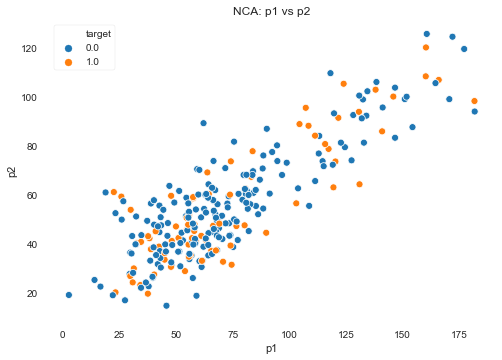

In [31]:
#%% NCA
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)